## Measuring the performance of unknown strategies
### 1. Introduction
In this assignment, we are required to measure the performance of unknown strategies, the daily returns of these strategies are given. My work can be devided into 3 parts, the first part is to calculate as many as possible the statistics that I find may help determine the performance. The second part is to implement functions to calculate these choosen statistics above and then analysis the results. The final part is to design a ranking system to take the advantage of obtained infromation and then give a final result.

For the daily return data, I assume that all the given data are logreturn.

### 2. Feature selection and Function design
Based on the material presented in class,for numerical statistics,I choose each year's annualized return, annualized standard deviation ,mean daily return, information ratio, percentage of winners(which means the percentage of trading days that made a gain), max draw down, max draw down in continuous 5 days, drough(the time for the strategy to reach its max draw down), time to recover from the max draw down and the correlation covariance between strategy return and closing price. The yearly_statistic() function calculate those numerical statistics.


I also present some graphs. The first graph shows the cummulative return of the strategy as well as the closing preice,thus give an intuitive report of the relationship between the strategy and the closing price. The second graph is a bar chart showing the cummulative monthly return of the strategy, it also report the standard deviation of cummulative monthly return. The last 2 graphs are pie charts, they give information about the proportion of top 10% gaining & lossing days in total gain and loss.The plot_daily_return() function help ploting the results.

### 3. Reult demonstration & analysis
I select 03_03,03_08,01_02,01_06,01_12 as my target strategies. The results will be presented in appendix.

For 03_03, it has a 0.87 overall information ratio, and it has a 0.048 max draw down, which has not been recovered yet.The top 10% gain accounts for 31.3% of its total gain, and the top 10% loss accounts for 19.5% of its total loss.

For 03_08, it has a 0.69 overall information ratio, and it has a 0.058 max draw down, which has not been recovered yet.The top 10% gain accounts for 30.9% of its total gain, and the top 10% loss accounts for 18.8% of its total loss.

For 01_02, it has a 0.61 overall information ratio, and it has a 0.074 max draw down, which took 49 days to recover.The top 10% gain accounts for 31.5% of its total gain, and the top 10% loss accounts for 19.2% of its total loss.

For 01_06, it has a 0.97 overall information ratio, and it has a 0.052 max draw down, which took 114 days to recover.The top 10% gain accounts for 30.8% of its total gain, and the top 10% loss accounts for 19.4% of its total loss.

For 01_12, it has a 1.06 overall information ratio, and it has a 0.057 max draw down, which took 36 days to recover.The top 10% gain accounts for 30.6% of its total gain, and the top 10% loss accounts for 18.9% of its total loss.

I find that annualized return, annualized deviation, information ratio, % winners, max draw down and max draw down in continuous 5 days differ from each strategy. There is not an obvious relationship between the magnitude of max draw down and drough. For drough, I firstly consider it  an indicator of the stability of the strategy, but since the drough vary dramatically in different years for the same strategy, I do not take it into consideration in my final ranking. For time to recover, I find out that two of the strategies have not recovered from the draw down yet so I do not use this indicator.




### 4. Ranking method design & Final result

The remaining statistics are annualized return, annualized return's standard deviation, information ratio, %winners, max draw down and max draw down in continuous 5 days. A good ranking strategy is to consider all these statistics. So I use a score system. For each factor, I give a score ranging from 1-5 to measure each strategy's performence on this factor.Then I aggregate the score to get the final result. The results are provided below.

To make final report readable, I change all the logreturns to percentage returns.

The result suggests the "01_12" has the best performence, followed are "01_06","03_03","03_08","01_02".  For "03_08" and "01_02",although "01_02" has a higher return than "03_08" ,it is ranked the last because of it has a higher draw down. 

The final result are given below:

In [13]:
result

,annualized return,information ratio,% winners(>0),annualized return deviation,max draw down,max draw down in continuous 5 days,score
03_03,5.24%,0.87,45%,5.9%,4.9%,3.93%,19
03_08,3.72%,0.69,40.8%,5.3%,5.96%,3.92%,14
01_02,3.83%,0.61,50%,6.2%,7.64%,4.11%,9
01_06,6.11%,0.97,50.447%,6.1%,5.30%,2.75%,23
01_12,6.42%,1.06,50.447%,6.0%,5.93%,2.29%,26


In [14]:
ranking

,strategy
1,01_12
2,01_06
3,03_03
4,03_08
5,01_02


### 5 Appendix
In this part, all the code I use as well as the detailed statistics and graphs will be presented.

#### 5.1 Read and preprocess the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the file
data = pd.read_csv("Assignment#1_Performance_track_records.csv",index_col = 1)
data = data.set_index(pd.Index([datetime.datetime.strptime(x,"%m/%d/%Y %H:%M") for x in data.index]))
xs = data.index

#### 5.2 Function implementation

In [3]:
def plot_daily_return(item):
    fig = plt.figure(figsize=(8,4))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.title("cummulative daily returns")
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(xs,data[item].cumsum(),label=item+ " return")
    plt.legend()
    ax2 = ax1.twinx()
    ax2.plot(xs[1:],data["Price_Close"][1:],"y--",label="closing price")
    plt.legend()
    monthly_return = data[item].resample("M").sum()
    std = np.std(monthly_return)*pow(12,1/2)
    plt.subplots(1,1,figsize=(8,4))
    plt.subplot(1,1,1)
    plt.bar(monthly_return.index,monthly_return,width=30)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.title("cummulative monthly returns, std = "+str(std)[:6])
    plt.subplots(1,2,figsize=(10,5))
    plt.subplot(1,2,1)
    loss = data[data[item]<0][item]
    num_loss = loss.count()
    gain = data[data[item]>0][item]
    num_gain = gain.count()
    top_10_loss = data[item].sort_values()[:num_loss//10]
    top_10_gain = data[item].sort_values()[-num_gain//10:]
    plt.pie([top_10_gain.sum()*100,(gain.sum()-top_10_gain.sum())*100],explode=(0.1,0),
            labels=["top 10%","others"],shadow=True, autopct='%1.1f%%')
    plt.legend(loc="upper left")
    plt.title("top 10% gain")
    plt.subplot(1,2,2)
    plt.pie([-top_10_loss.sum()*100,(-loss.sum()-top_10_loss.sum())*100],explode=(0.1,0),
            labels=["top 10%","others"],shadow=True, autopct='%1.1f%%')
    plt.legend(loc="upper left")
    plt.title("top 10% loss")

In [4]:
def max_draw_down(returnlist):
    maxdd = 0
    max5dd = 0
    drough = 0
    index = returnlist.index.tolist()
    date = 0
    for i in range(1,len(returnlist)):
        tmp = min(returnlist[i:]) - max(returnlist[:i])
        if i+5 < len(returnlist):
            tmp2 = returnlist[i+5] - returnlist[i]
        if  tmp < maxdd: 
            maxdd = tmp
            drough = index.index(returnlist[i:].idxmin())-index.index(returnlist[:i].idxmax())
            date = returnlist[i:].idxmin()
        if tmp2 < max5dd:
            max5dd = tmp2
    return -maxdd*100,-max5dd*100,drough,date

def time_to_recover(df,item,datelist):
    resultlist = list()
    for i,date in enumerate(datelist):
        flag = True
        location = xs.tolist().index(date)+1
        j = 0
        while sum(data[item].iloc[location:location+j]) < df["max draw down(*10^-2)"][i]/100:
            j += 1
            if location+j == len(data):
                resultlist.append("not yet")
                flag = False
                break
        if flag: resultlist.append(j)
    return resultlist

def correlation(returnlist):
    closing_price = data["Price_Close"].loc[returnlist.index[0]:returnlist.index[-1],]
    return np.corrcoef(closing_price,returnlist)[0][1]

def yearly_statistic(item):
    tmp = pd.DataFrame()
    tmp["annualized return(*10^-2)"] = data[item].resample("Y").sum()*100
    tmp["stand deviation"] = data[item].resample("Y").apply(np.std)*pow(252,1/2)
    tmp["mean daily return(10^-4)"] = data[item].resample("Y").mean()*10000
    tmp["information ratio"]= tmp["annualized return(*10^-2)"]/tmp["stand deviation"]/pow(252,1/2)/100
    tmp["% winners(>0)"] = data[data[item]>0][item].resample("Y").count()/data[item].resample("Y").count()*100
    (tmp["max draw down(*10^-2)"],tmp["max draw down in 5 days(*10^-2)"],
            tmp["drough"],date) = zip(*data[item].cumsum().resample("Y").apply(max_draw_down))
    tmp["time to recover"] = time_to_recover(tmp,item,date)
    tmp["correlation w/ closing price"]= data[item].resample("Y").apply(correlation)
    tmp = tmp.set_index(pd.Index([x.year for x in tmp.index]),item)
    all_years = [data[item].sum()/3*100,np.std(data[item])*pow(252,1/2),data[item].mean()]
    all_years.append(all_years[0]/all_years[1]/100)
    all_years.append(data[data[item]>0][item].count()/data[item].count()*100)
    max_dd_,max_5dd_,drough_,date_ = max_draw_down(data[item].cumsum())
    all_years.append(max_dd_)
    all_years.append(max_5dd_)
    all_years.append(drough_)
    all_years.append(time_to_recover(pd.DataFrame(index=[date_],data={"max draw down(*10^-2)":[max_dd_]}),item,[date_])[0])
    all_years.append(np.corrcoef(data["Price_Close"],data[item])[0][1])
    tmp.loc["Total"] = all_years
    formater = "{0:.03f}".format
    number_index = tmp.columns.tolist()
    number_index.remove("time to recover")
    number_index.remove("drough")
    tmp[number_index] = tmp[number_index].applymap(formater)
    return tmp
    

#### 5.3 Result demonstration

#### 03_03

,annualized return(*10^-2),stand deviation,mean daily return(10^-4),information ratio,% winners(>0),max draw down(*10^-2),max draw down in 5 days(*10^-2),drough,time to recover,correlation w/ closing price
2014,1.582,0.059,0.606,0.017,39.080,4.183,2.771,37,39,0.019
2015,10.660,0.052,4.084,0.129,47.510,2.779,1.821,19,73,0.094
2016,3.087,0.065,1.183,0.030,49.042,4.784,3.852,103,not yet,-0.058
Total,5.110,0.059,0.000,0.865,45.211,4.784,3.852,103,not yet,-0.014


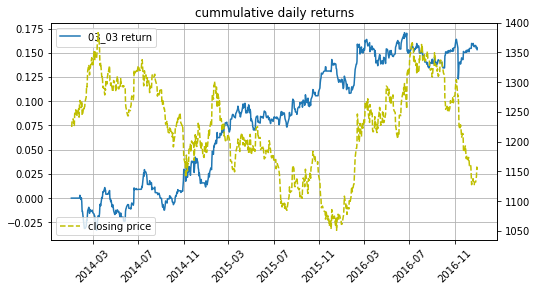

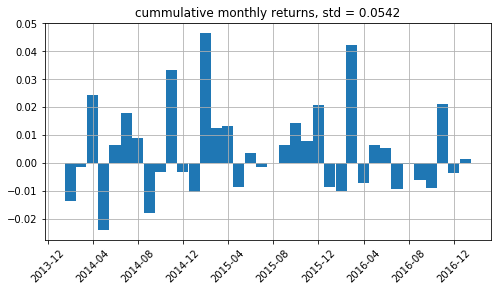

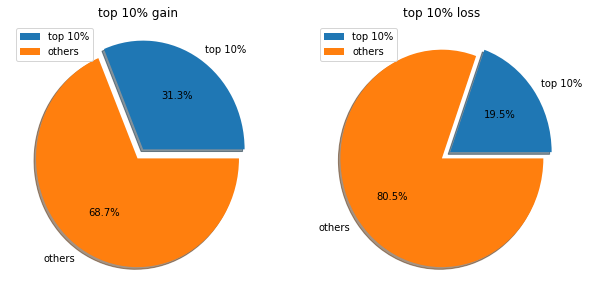

In [5]:
plot_daily_return("03_03")
yearly_statistic("03_03")

#### 03_08

,annualized return(*10^-2),stand deviation,mean daily return(10^-4),information ratio,% winners(>0),max draw down(*10^-2),max draw down in 5 days(*10^-2),drough,time to recover,correlation w/ closing price
2014,3.430,0.053,1.314,0.041,33.333,4.402,2.702,15,33,0.064
2015,5.719,0.052,2.191,0.069,45.977,3.915,1.913,26,not yet,0.122
2016,1.820,0.055,0.697,0.021,43.295,4.107,2.037,76,not yet,-0.007
Total,3.657,0.053,0.000,0.687,40.868,5.794,2.702,52,not yet,0.038


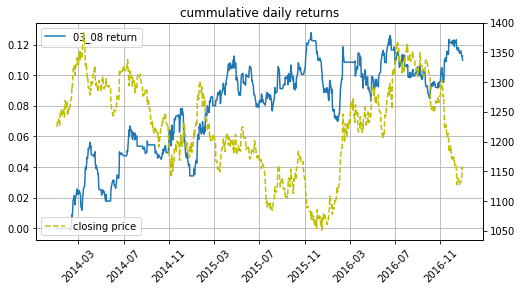

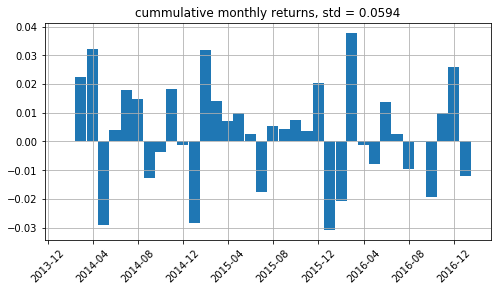

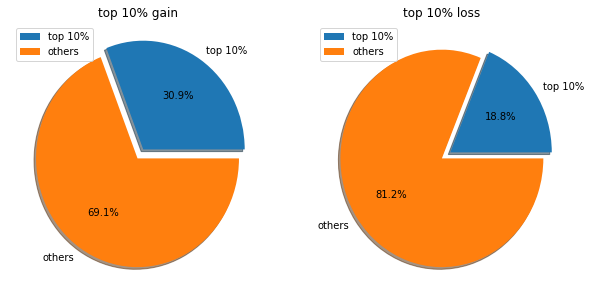

In [6]:
plot_daily_return("03_08")
yearly_statistic("03_08")

#### 01_02

,annualized return(*10^-2),stand deviation,mean daily return(10^-4),information ratio,% winners(>0),max draw down(*10^-2),max draw down in 5 days(*10^-2),drough,time to recover,correlation w/ closing price
2014,-0.089,0.064,-0.034,-0.001,47.510,7.361,4.027,24.0,49.0,0.018
2015,6.912,0.059,2.648,0.074,51.341,4.570,2.866,81.0,74.0,0.103
2016,4.471,0.063,1.713,0.045,51.341,7.234,2.198,51.0,150.0,0.010
Total,3.765,0.062,0.000,0.608,50.064,7.361,4.027,24.0,49.0,0.018


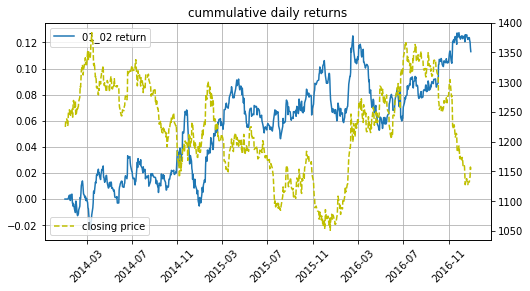

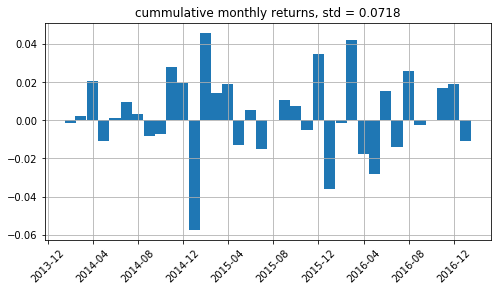

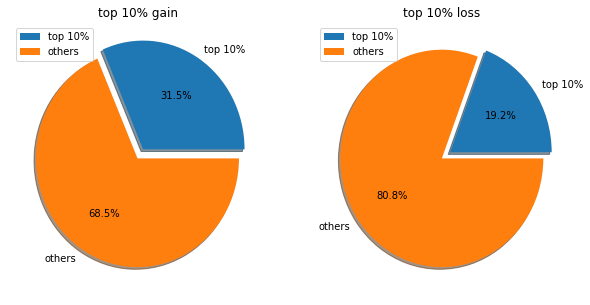

In [7]:
plot_daily_return("01_02")
yearly_statistic("01_02")

#### 01_06

,annualized return(*10^-2),stand deviation,mean daily return(10^-4),information ratio,% winners(>0),max draw down(*10^-2),max draw down in 5 days(*10^-2),drough,time to recover,correlation w/ closing price
2014,1.014,0.063,0.388,0.010,46.743,5.161,2.710,38.0,114.0,0.037
2015,9.826,0.058,3.765,0.107,52.107,2.621,1.881,11.0,50.0,0.070
2016,6.941,0.062,2.659,0.071,52.490,2.797,2.034,68.0,23.0,-0.026
Total,5.927,0.061,0.000,0.975,50.447,5.161,2.710,38.0,114.0,0.005


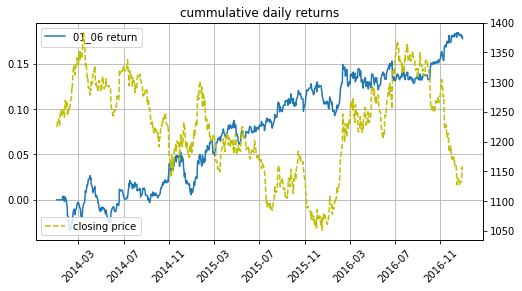

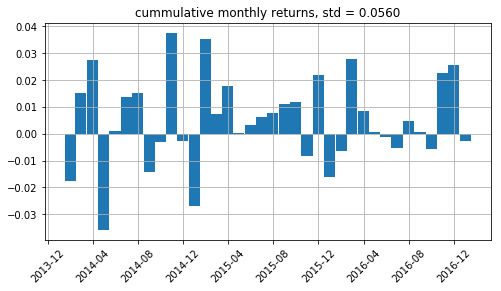

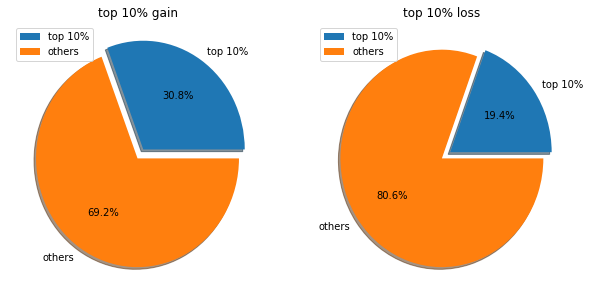

In [8]:
plot_daily_return("01_06")
yearly_statistic("01_06")

#### 01_12

,annualized return(*10^-2),stand deviation,mean daily return(10^-4),information ratio,% winners(>0),max draw down(*10^-2),max draw down in 5 days(*10^-2),drough,time to recover,correlation w/ closing price
2014,-0.311,0.060,-0.119,-0.003,46.360,5.762,1.983,29.0,36.0,0.055
2015,9.520,0.057,3.647,0.104,52.490,3.787,2.171,67.0,46.0,0.093
2016,9.457,0.060,3.624,0.099,52.490,4.466,2.261,51.0,114.0,-0.028
Total,6.222,0.059,0.000,1.055,50.447,5.762,2.261,29.0,36.0,0.017


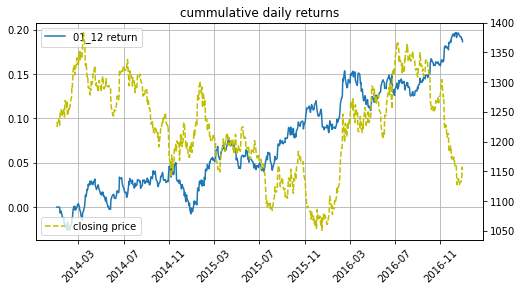

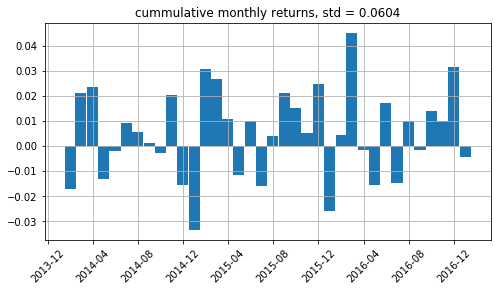

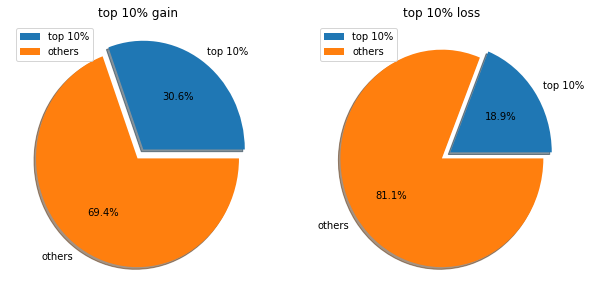

In [9]:
plot_daily_return("01_12")
yearly_statistic("01_12")

#### 5.4 Change from logreturn to percentage return

In [10]:
logreturn = [0.051097,0.036565,0.037647,0.059268,0.062220]
logdrawdown = [0.047840,0.057939,0.073610,0.051608,0.057621]
logdrawdown_5days = [0.038516,0.038446,0.040275,0.027099,0.022612]
percentreturn = np.exp(logreturn)-1
percentdrawdown = np.exp(logdrawdown)-1
percentdrawdown_5days = np.exp(logdrawdown_5days)-1
print(percentreturn)
print(percentdrawdown)
print(percentdrawdown_5days)

[0.05242497 0.03724172 0.03836463 0.06105957 0.06419644]
[0.0490028  0.05965036 0.07638693 0.0529629  0.05931344]
[0.03926736 0.03919461 0.04109704 0.02746952 0.02286959]


In [11]:
result = pd.DataFrame(data={"annualized return":["5.24%","3.72%","3.83%","6.11%","6.42%"],
                            "information ratio":["0.87","0.69","0.61","0.97","1.06"],
                            "% winners(>0)":["45%","40.8%","50%","50.447%","50.447%"],
                            "annualized return deviation":["5.9%","5.3%","6.2%","6.1%","6.0%"],
                            "max draw down":["4.9%","5.96%","7.64%","5.30%","5.93%"],
                            "max draw down in continuous 5 days":["3.93%","3.92%","4.11%","2.75%","2.29%"],
                            "score":[19,14,9,23,26]}, index=["03_03","03_08","01_02","01_06","01_12"])
                            
ranking = pd.DataFrame(data={"strategy":["01_12","01_06", "03_03","03_08","01_02"]},index=[1,2,3,4,5])                           